In [1]:
import numpy as np
import tensorflow as tf
import keras
import keras.backend as K

Using TensorFlow backend.


In [2]:
from keras.models import Model
from keras.layers import Dense, Embedding, Dropout,Flatten,Concatenate, Masking
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [3]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'
config.gpu_options.allow_growth = True

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.9

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [66]:
def mse_multiDim_loss(y_true, y_pred):
    return K.mean(K.sum(K.square(y_true - y_pred),axis = -1, keepdims=True))

In [75]:
#input data
import os
data_dir = "/home/niteesh/Documents/uni/HCI/Saarland/Npy_files/"
files = os.listdir(data_dir)
for f in files:
    file = data_dir + f
    if f== files[0]:
        data = np.load(file)
    else:
        data = np.vstack((data,np.load(file)))
        
data = np.load(data_dir + "7.npy")
print(data.shape)

(720, 16, 2)


In [76]:
#Hyper-parameters, constants
max_length_saccades = 7
learning_rate=0.01

In [77]:
#format data
Input = data[:,0:max_length_saccades,:]
y = data[:,-1,:]
print(Input.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(Input, y, test_size=0.33)


(720, 7, 2)
(720, 2)


In [78]:
optimizer = keras.optimizers.RMSprop(lr=learning_rate)
model = keras.models.Sequential()

layer1 = model.add(Masking(mask_value=np.inf, input_shape=(max_length_saccades, 2),name = 'mask_layer'))

layer2 = model.add(LSTM(16, return_sequences=True,))

layer3 = model.add(LSTM(16,return_sequences=False,))  
# returns a sequence of vectors of dimension 32

#model.add(Dropout(0.5))
#model.add(LSTM(8, return_sequences=True))  
# returns a sequence of vectors of dimension 32


#layer4 = model.add(Dropout(0.2))
#model.add(Flatten())

model.add(Dense(16, activation='relu'))

output_layer = model.add(Dense(2, activation='linear',name = 'output_layers'))
#output_layer = model.add(LSTM(2,activation=None,return_sequences=False)) 

# try using different optimizers and different optimizer configs
#model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])

model.compile(loss=mse_multiDim_loss,
              optimizer=optimizer,)
# Print summary
model.summary()
print("Inputs: {}".format(model.input_shape))
print("Outputs: {}".format(model.output_shape))
print("Actual input: {}".format(Input.shape))
print("Actual output: {}".format(y.shape))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mask_layer (Masking)         (None, 7, 2)              0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 7, 16)             1216      
_________________________________________________________________
lstm_23 (LSTM)               (None, 16)                2112      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
output_layers (Dense)        (None, 2)                 34        
Total params: 3,634
Trainable params: 3,634
Non-trainable params: 0
_________________________________________________________________
Inputs: (None, 7, 2)
Outputs: (None, 2)
Actual input: (720, 7, 2)
Actual output: (720, 2)


In [79]:
#Fit the model to data
history = model.fit(x = Input, y= y, batch_size= 32, epochs = 200, verbose = 1, validation_split = 0.1, shuffle = True  )

Train on 648 samples, validate on 72 samples
Epoch 1/200
648/648 [==============================] - 2s 3ms/step - loss: 2997977.5586 - val_loss: 3471931.7500
Epoch 2/200
648/648 [==============================] - 0s 662us/step - loss: 2840330.1728 - val_loss: 3295870.3056
Epoch 3/200
648/648 [==============================] - 0s 643us/step - loss: 2654605.5309 - val_loss: 3085845.8611
Epoch 4/200
648/648 [==============================] - 0s 647us/step - loss: 2437864.5123 - val_loss: 2846889.1806
Epoch 5/200
648/648 [==============================] - 0s 653us/step - loss: 2201989.4259 - val_loss: 2591629.1597
Epoch 6/200
648/648 [==============================] - 0s 647us/step - loss: 1955232.5216 - val_loss: 2332334.7847
Epoch 7/200
648/648 [==============================] - 0s 641us/step - loss: 1711457.5093 - val_loss: 2084913.8750
Epoch 8/200
648/648 [==============================] - 0s 670us/step - loss: 1488156.3410 - val_loss: 1857044.0278
Epoch 9/200
648/648 [================

648/648 [==============================] - 0s 626us/step - loss: 797437.8596 - val_loss: 1008885.4306
Epoch 73/200
648/648 [==============================] - 0s 594us/step - loss: 798310.2346 - val_loss: 997916.8125
Epoch 74/200
648/648 [==============================] - 0s 566us/step - loss: 820256.0239 - val_loss: 1036462.1076
Epoch 75/200
648/648 [==============================] - 0s 606us/step - loss: 778696.4769 - val_loss: 953519.1458
Epoch 76/200
648/648 [==============================] - 0s 700us/step - loss: 770502.5671 - val_loss: 997762.1667
Epoch 77/200
648/648 [==============================] - 0s 655us/step - loss: 776683.7562 - val_loss: 1044514.9653
Epoch 78/200
648/648 [==============================] - 0s 655us/step - loss: 783621.4946 - val_loss: 972762.6528
Epoch 79/200
648/648 [==============================] - 0s 639us/step - loss: 789180.0316 - val_loss: 1004047.2292
Epoch 80/200
648/648 [==============================] - 0s 658us/step - loss: 790765.7168 - val_l

648/648 [==============================] - 0s 602us/step - loss: 806522.5370 - val_loss: 1025172.0694
Epoch 144/200
648/648 [==============================] - 0s 659us/step - loss: 805933.6003 - val_loss: 963467.0278
Epoch 145/200
648/648 [==============================] - 0s 666us/step - loss: 800659.1921 - val_loss: 924504.5833
Epoch 146/200
648/648 [==============================] - 0s 566us/step - loss: 796252.9066 - val_loss: 979126.2569
Epoch 147/200
648/648 [==============================] - 0s 568us/step - loss: 788425.4360 - val_loss: 960551.8507
Epoch 148/200
648/648 [==============================] - 0s 728us/step - loss: 757378.5795 - val_loss: 924986.6806
Epoch 149/200
648/648 [==============================] - 0s 700us/step - loss: 746980.6049 - val_loss: 930937.1944
Epoch 150/200
648/648 [==============================] - 0s 675us/step - loss: 749877.0123 - val_loss: 926697.1181
Epoch 151/200
648/648 [==============================] - 0s 670us/step - loss: 746316.1983 - 

In [2]:
import matplotlib.pyplot as plt

l_test = (history.history['val_loss'])
l_train = (history.history['loss'])
l_test = np.sqrt(history.history['val_loss'])
l_train = np.sqrt(history.history['loss'])
plt.plot(l_train, label="Training Loss")
plt.plot(l_test, label="Test Accuracy")
plt.legend()

NameError: name 'history' is not defined

In [82]:
#model.outputs[0]
#m.outputs = 
y_pred = model.predict(Input)
print(y_pred[0:10])
print(y[0:10])

[[ 995.0578   784.95935]
 [ 747.85504  601.9293 ]
 [ 995.0578   784.95935]
 [ 995.0578   784.95935]
 [ 904.98224  767.04724]
 [1580.4026   725.70636]
 [ 265.7959  -737.6951 ]
 [ 934.54315  793.724  ]
 [ 995.0578   784.95935]
 [ 995.0578   784.95935]]
[[2197.89312   -238.09536  ]
 [ 511.68      1078.24752  ]
 [ 142.275072  1302.79032  ]
 [ 173.42272     16.9751448]
 [  68.96832     16.1958168]
 [1630.16192   -468.62352  ]
 [ 271.971328  -751.5576   ]
 [ 718.98112   1027.07064  ]
 [ 173.488896  1280.47824  ]
 [ 136.454016  1321.77888  ]]


([array([  0.,   0.,   0.,   0.,   1.,   2.,  10., 296.,   5., 406.]),
  array([  1.,   0.,   0.,   2.,   3.,   1., 713.,   0.,   0.,   0.])],
 array([-737.6951  , -499.05222 , -260.40927 ,  -21.766352,  216.87657 ,
         455.5195  ,  694.1624  ,  932.80536 , 1171.4482  , 1410.0912  ,
        1648.7341  ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

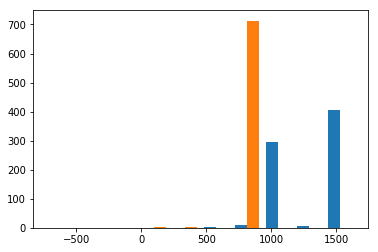

In [83]:
plt.hist(y_pred)

([array([  3.,  64., 202., 106., 104., 236.,   3.,   1.,   0.,   1.]),
  array([  5.,  74., 281., 356.,   4.,   0.,   0.,   0.,   0.,   0.])],
 array([-983.20512 , -393.042048,  197.121024,  787.284096, 1377.447168,
        1967.61024 , 2557.773312, 3147.936384, 3738.099456, 4328.262528,
        4918.4256  ]),
 <a list of 2 Lists of Patches objects>)

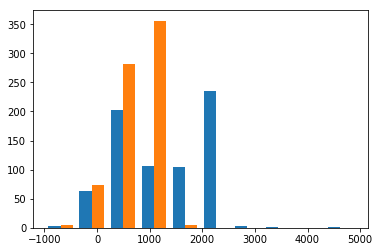

In [84]:
plt.hist(y)

In [31]:
layer_name = 'my_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('mask_layer').output)
intermediate_output = intermediate_layer_model.predict(Input[107:108])
print(intermediate_output)
print(Input[107:108])

[[[950.71747 817.4354 ]
  [956.105   816.6341 ]
  [949.5693  813.35016]
  [937.4784  813.0262 ]
  [911.65314 805.8622 ]
  [871.5379  816.5585 ]
  [      nan       nan]]]
[[[950.71744 817.43544]
  [956.10496 816.63408]
  [949.56928 813.35016]
  [937.4784  813.02616]
  [911.65312 805.86216]
  [871.53792 816.55848]
  [      inf       inf]]]


In [520]:
model.get_layer('masking_30')

In [538]:
Input[0:1].shape


(1, 6, 2)

In [19]:
history.history

{'val_loss': [1579796.705882353,
  1579553.3946078431,
  1579275.7083333333,
  1579000.8848039217,
  1578702.931372549,
  1578393.8995098039,
  1578038.7745098039,
  1577697.012254902,
  1577373.3406862745,
  1577030.9534313725,
  1576676.9411764706,
  1576311.6715686275,
  1575965.4632352942,
  1575604.5637254901,
  1575267.1348039217,
  1574929.8284313725,
  1574596.4093137255,
  1574264.6102941176,
  1573941.7426470588,
  1573619.9460784313,
  1573299.9142156863,
  1572995.556372549,
  1572689.5906862745,
  1572395.9044117648,
  1572099.556372549,
  1571808.0710784313,
  1571516.3578431373,
  1571232.9117647058,
  1570951.2916666667,
  1570691.6838235294,
  1570431.7034313725,
  1570180.7303921569,
  1569928.056372549,
  1569678.4289215687,
  1569440.3357843137,
  1569210.5196078431,
  1568982.281862745,
  1568765.669117647,
  1568553.7450980393,
  1568357.7401960783,
  1568153.9485294118,
  1567946.2132352942,
  1567759.4852941176,
  1567569.693627451,
  1567395.2401960783,
  15672

In [87]:
y.max()

4918.4256

(array([3.4000e+02, 2.0941e+04, 4.4879e+04, 2.7261e+04, 5.3311e+04,
        3.1400e+02, 1.8000e+01, 4.0000e+00, 0.0000e+00, 2.3800e+02]),
 array([-0.557279 , -0.2412341,  0.0748108,  0.3908557,  0.7069006,
         1.0229455,  1.3389904,  1.6550353,  1.9710802,  2.2871251,
         2.60317  ]),
 <a list of 10 Patch objects>)

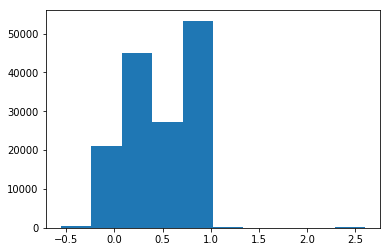

In [5]:
import os
import numpy as np
data_dir = "/home/niteesh/Documents/uni/HCI/Saarland/Supplementary/DATA/GazeData"
files = os.listdir(data_dir)
files.sort()

files = [files[6]]
for f in files:
    file = data_dir + "/" + f
    data = np.genfromtxt(file, skip_header=1, delimiter='|')

plt.hist(data[:,2])